#CNN models for 912*912 chest dataset

In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import keras
from keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import BatchNormalization

Found 1000 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.


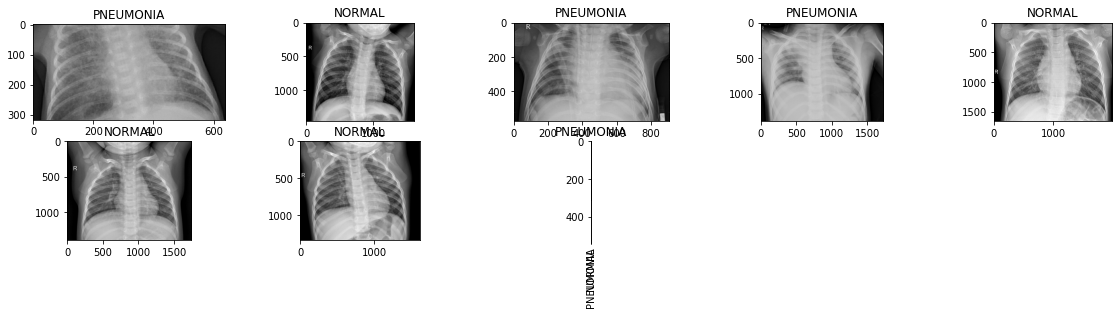

In [2]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (912, 912))
    return img

import os
import pandas as pd
from random import sample

def load_dataset(path, label1_count, label2_count):
    dataset = []
    labels = []
    label1_loaded = 0
    label2_loaded = 0
    
    for label in os.listdir(path):
        label_path = os.path.join(path, label)
        
        if label == 'NORMAL' and label1_loaded >= label1_count:
            continue
        elif label == 'PNEUMONIA' and label2_loaded >= label2_count:
            continue
        
        images = os.listdir(label_path)
        selected_images = sample(images, min(len(images), label1_count if label == 'NORMAL' else label2_count))
        
        for img in selected_images:
            img_path = os.path.join(label_path, img)
            dataset.append(img_path)
            labels.append(label)
            
            if label == 'NORMAL':
                label1_loaded += 1
            elif label == 'PNEUMONIA':
                label2_loaded += 1
            
            if label1_loaded >= label1_count and label2_loaded >= label2_count:
                break
        
        if label1_loaded >= label1_count and label2_loaded >= label2_count:
            break
    
    df = pd.DataFrame({'image': dataset, 'label': labels})
    return df



#train_df = load_dataset('C:/Users/prati/OneDrive/Desktop/Graduate course/698/H_mask_912/train/', label1_count=1000, label2_count=1000)
train_df = load_dataset('C:/Users/prati/OneDrive/Desktop/Graduate course/698/ChestXRay2017/chest_xray/train/', label1_count=500, label2_count=500)
train_df

test_df = load_dataset('C:/Users/prati/OneDrive/Desktop/Graduate course/698/ChestXRay2017/chest_xray/test/',label1_count=100, label2_count=100)
test_df

val_df = load_dataset('C:/Users/prati/OneDrive/Desktop/Graduate course/698/ChestXRay2017/chest_xray/val/',label1_count=8, label2_count=8)
val_df

def plot_sample_data(df, sample_size):
    for i in range(sample_size):
        random_data_location = np.random.randint(df.shape[0])
        plt.subplot(2, 5, i+1)
        plt.imshow(cv2.imread(str(df.iloc[random_data_location]['image'])))
        plt.title(df.iloc[random_data_location]['label'])

plt.figure(figsize=(20,4))
plot_sample_data(train_df, 8)

train_df['label'].value_counts().plot(kind = 'bar')

test_df['label'].value_counts().plot(kind = 'bar')

val_df['label'].value_counts().plot(kind = 'bar')

def scaler(img):
    return img

train_aug = ImageDataGenerator(preprocessing_function = scaler)
test_aug = ImageDataGenerator(preprocessing_function = scaler)
val_aug = ImageDataGenerator(preprocessing_function = scaler)

channels = 3
batch_size = 32
img_size = (224, 224)
img_shape = (img_size[0], img_size[1], channels)

train_gen = train_aug.flow_from_dataframe(
    train_df, x_col = 'image', y_col = 'label',
    target_size = img_size, class_mode = 'categorical',
    color_mode = 'rgb', shuffle = True
)

test_gen = test_aug.flow_from_dataframe(
    test_df, x_col = 'image', y_col = 'label',
    target_size = img_size, class_mode = 'categorical',
    color_mode = 'rgb', shuffle = True
)

val_gen = val_aug.flow_from_dataframe(
    val_df, x_col = 'image', y_col = 'label',
    target_size = img_size, class_mode = 'categorical',
    color_mode = 'rgb', shuffle = True
)

In [3]:
Cnn_model_3 = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = img_shape),
    MaxPool2D((2,2)),
    Conv2D(64, (3,3), activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(128, (3,3), activation = 'relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

Cnn_model_3.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
Cnn_model_3.summary()

cnn_history_3 = Cnn_model_3.fit(x = train_gen, epochs = 5, validation_data = val_gen)

test_loss, test_acc = Cnn_model_3.evaluate(test_gen)
print(f"Test accuracy: {test_acc}")





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

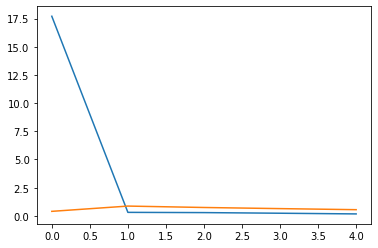

In [4]:
plt.plot(cnn_history_3.history['loss'])
plt.plot(cnn_history_3.history['val_loss'])

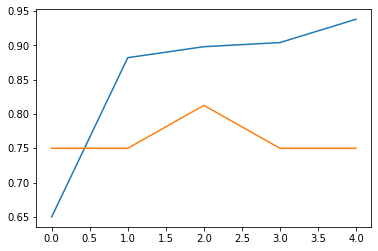

In [5]:
plt.plot(cnn_history_3.history['accuracy'])
plt.plot(cnn_history_3.history['val_accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 220, 220, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 106, 106, 64)      51264     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 53, 53, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 49, 49, 128)       204928    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 128)      

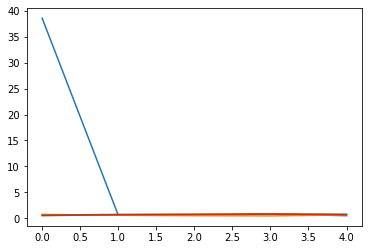

In [6]:
Cnn_model_5 = Sequential([
    Conv2D(32, (5,5), activation = 'relu', input_shape = img_shape),
    MaxPool2D((2,2)),
    Conv2D(64, (5,5), activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(128, (5,5), activation = 'relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

Cnn_model_5.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
Cnn_model_5.summary()

cnn_history_5 = Cnn_model_5.fit(x = train_gen, epochs = 5, validation_data = val_gen)

test_loss, test_acc = Cnn_model_5.evaluate(test_gen)
print(f"Test accuracy: {test_acc}")

plt.plot(cnn_history_5.history['loss'])
plt.plot(cnn_history_5.history['val_loss'])

plt.plot(cnn_history_5.history['accuracy'])
plt.plot(cnn_history_5.history['val_accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 218, 218, 32)      4736      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 109, 109, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 103, 103, 64)      100416    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 51, 51, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 128)       401536    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 22, 22, 128)      

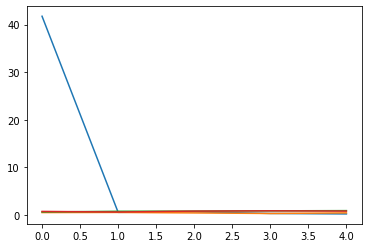

In [7]:
Cnn_model_7 = Sequential([
    Conv2D(32, (7,7), activation = 'relu', input_shape = img_shape),
    MaxPool2D((2,2)),
    Conv2D(64, (7,7), activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(128, (7,7), activation = 'relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

Cnn_model_7.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
Cnn_model_7.summary()

cnn_history_7 = Cnn_model_7.fit(x = train_gen, epochs = 5, validation_data = val_gen)

test_loss, test_acc = Cnn_model_7.evaluate(test_gen)
print(f"Test accuracy: {test_acc}")

plt.plot(cnn_history_7.history['loss'])
plt.plot(cnn_history_7.history['val_loss'])

plt.plot(cnn_history_7.history['accuracy'])
plt.plot(cnn_history_7.history['val_accuracy'])